Instalar la siguiente libreria:

!pip install psycopg2

# Cargar las librerias

In [1]:
import psycopg2
import pandas as pd

In [2]:
# Reemplaza estos valores con los de tu base de datos
dbname = "walmart2"
user = "postgres"
password = "naren2020"
host = "localhost"

In [3]:
# Establece la conexión
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host)

In [4]:
# Crea un cursor para ejecutar consultas

sql = "SELECT * FROM walmart_db2;"

In [5]:
# Ejecuta la consulta y guarda los resultados en un cursor
cursor = conn.cursor()

# Ejecuta una consulta
cursor.execute(sql)

In [6]:
# Crea un DataFrame a partir de los resultados del cursor
df = pd.read_sql_query(sql, conn)
df

/var/folders/wz/hfsksc4d0h1gqgq5z6wld3vr0000gn/T/ipykernel_14315/3622587619.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql, conn)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,45,2012-01-06,714081.06,0,35.88,3.422,189.19406,8.424
1,45,2012-01-13,676615.50,0,41.18,3.513,189.32610,8.424
2,45,2012-01-20,700392.20,0,31.85,3.533,189.42148,8.424
3,45,2012-01-27,624081.60,0,37.93,3.567,189.51685,8.424
4,45,2012-02-03,757330.94,0,42.96,3.617,189.61223,8.424
...,...,...,...,...,...,...,...,...
6430,45,2011-12-02,875699.80,0,50.19,3.452,188.50244,8.523
6431,45,2011-12-09,957155.30,0,46.57,3.415,188.65446,8.523
6432,45,2011-12-16,1078905.60,0,39.93,3.413,188.79793,8.523
6433,45,2011-12-23,1521958.00,0,42.27,3.389,188.92998,8.523


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [9]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [11]:
df["Date"] = pd.to_datetime(df["Date"], format = "%d-%m-%Y")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,45,2012-01-06,714081.06,0,35.88,3.422,189.19406,8.424
1,45,2012-01-13,676615.50,0,41.18,3.513,189.32610,8.424
2,45,2012-01-20,700392.20,0,31.85,3.533,189.42148,8.424
3,45,2012-01-27,624081.60,0,37.93,3.567,189.51685,8.424
4,45,2012-02-03,757330.94,0,42.96,3.617,189.61223,8.424
...,...,...,...,...,...,...,...,...
6430,45,2011-12-02,875699.80,0,50.19,3.452,188.50244,8.523
6431,45,2011-12-09,957155.30,0,46.57,3.415,188.65446,8.523
6432,45,2011-12-16,1078905.60,0,39.93,3.413,188.79793,8.523
6433,45,2011-12-23,1521958.00,0,42.27,3.389,188.92998,8.523


In [12]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [22]:
date_sale = df[["Date", "Store", "Weekly_Sales"]].groupby(["Date", "Store", "Weekly_Sales"]).sum().reset_index()
date_sale

,Date,Store,Weekly_Sales
0,2010-02-05,1,1643690.90
1,2010-02-05,2,2136989.50
2,2010-02-05,3,461622.22
3,2010-02-05,4,2135143.80
4,2010-02-05,5,317173.10
...,...,...,...
6430,2012-10-26,41,1316542.60
6431,2012-10-26,42,514756.10
6432,2012-10-26,43,587603.56
6433,2012-10-26,44,361067.06


In [23]:
tienda_37 = date_sale[date_sale["Store"] == 37]
tienda_37

,Date,Store,Weekly_Sales
36,2010-02-05,37,536006.75
81,2010-02-12,37,529852.70
126,2010-02-19,37,510382.50
171,2010-02-26,37,513615.80
216,2010-03-05,37,519255.70
...,...,...,...
6246,2012-09-28,37,527953.10
6291,2012-10-05,37,546122.40
6336,2012-10-12,37,521810.75
6381,2012-10-19,37,551969.10


In [25]:
tienda_37.to_csv("tienda37.csv", index= False)

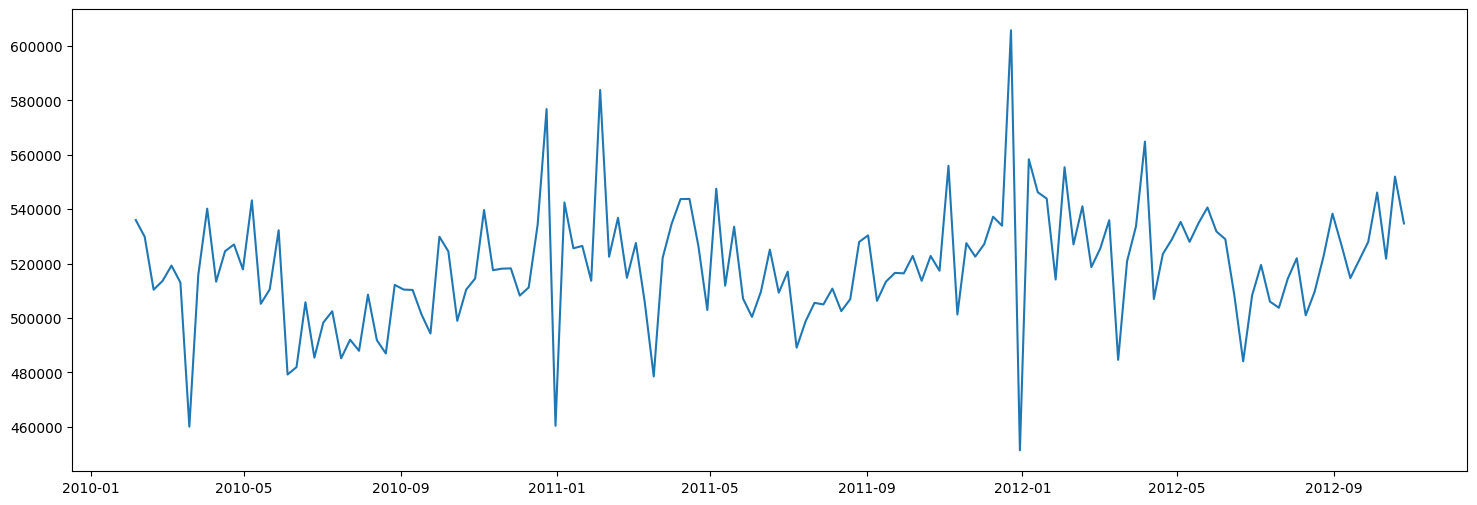

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (18,6))
plt.plot(tienda_37["Date"], tienda_37["Weekly_Sales"], label = "Ventas")
plt.show()

In [ ]:
# Cierra la conexión
conn.close()
